<center><h1><strong><font color="blue">Pelatihan Asociate Data Scientist (ADS) - Module 02 Hari 02</font></strong></h1></center>

<img alt="" src="images/covers/cover_uin-aptikom-taudata.jpg"/>

In [ ]:
# Install Visual Python di Jupyter Notebook
# https://visualpython.ai/use-extension
!pip install jupyterlab-visualpython
!visualpy install

<center><h1><strong><font color="blue">Uraian Pertemuan Hari ke-02</font></strong></h1></center>

* <strong><font color="blue">Penelaahan Data (EDA)</font></strong>
  * Memuat Data & Meyakinkan Tipe Data
  * Noise
  * Duplikasi
  * Outlier
  * Missing Value 
  * Transformasi
  * Statistika Deskriptif
  * Visualisasi & Analisa
  * Simpan data untuk pemodelan
  * Latihan 01
* <strong><font color="blue">Regresi Logistik</font></strong>
  * Penjelasan
  * Penelaahan Data Regresi Logistik
  * Evaluasi
  * Optimasi Parameter & Cross Validasi
  * Interpretasi & Rekomendasi
  * Latihan 02
* <strong><font color="blue">Pohon Keputusan (Decision Tree)</font></strong>
  * Penjelasan
  * Penelaahan Data Pohon Keputusan
  * Evaluasi
  * Optimasi Parameter  & Cross Validasi
  * Visualisasi, Interpretasi, dan Rekomendasi
  * Latihan 03
  
<center><h3><strong><font color="red">Menggunakan Visual-Python dengan Sedikit Modifikasi</font></strong></h3></center>

<center><h1><strong><font color="blue">Data Untuk Studi Kasus</font></strong></h1></center>

* Data "Adult" ==> Hasil Sensus Penghasilan di US Tahun 1994
* Variabel Target: Apakah Penghasilan <=$50k atau lebih.
* Sumber, Kasus, dan Keterangan Data: http://archive.ics.uci.edu/dataset/2/adult
* Mirror Data dalam format CSV: https://raw.githubusercontent.com/taudataanalytics/eLearning/master/data/adult.csv

<img alt="" src="images/us-census-bureau.png"/>

<center><h1><strong><font color="blue">Penelaahan Data (EDA) 01: Memuat Data & Tipe Data </font></strong></h1></center>

In [61]:
# Loading Data Untuk Latihan
import warnings; warnings.simplefilter('ignore')
import pandas as pd # Loading Module yang dibutuhkan

file_ = 'data/adult.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    df = pd.read_csv(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/eLearning/master/data/adult.csv
    df = pd.read_csv(file_)
    
N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df.head()

baris =  48842 , Kolom (jumlah variabel) =  15


,Umur,Sektor,fnlwgt,Pendidikan,KelasPendidikan,Status,Pekerjaan,Relationship,Ras,Gender,Gain,Loss,JamKerjaHarian,AsalNegara,Penghasilan
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Umur             48842 non-null  int64 
 1   Sektor           48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   Pendidikan       48842 non-null  object
 4   KelasPendidikan  48842 non-null  int64 
 5   Status           48842 non-null  object
 6   Pekerjaan        48842 non-null  object
 7   Relationship     48842 non-null  object
 8   Ras              48842 non-null  object
 9   Gender           48842 non-null  object
 10  Gain             48842 non-null  int64 
 11  Loss             48842 non-null  int64 
 12  JamKerjaHarian   48842 non-null  int64 
 13  AsalNegara       48842 non-null  object
 14  Penghasilan      48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [63]:
varObjects = df.select_dtypes(include = ['object'])
varObjects.head()

,Sektor,Pendidikan,Status,Pekerjaan,Relationship,Ras,Gender,AsalNegara,Penghasilan
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [64]:
for col in varObjects.columns:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Umur             48842 non-null  int64   
 1   Sektor           48842 non-null  category
 2   fnlwgt           48842 non-null  int64   
 3   Pendidikan       48842 non-null  category
 4   KelasPendidikan  48842 non-null  int64   
 5   Status           48842 non-null  category
 6   Pekerjaan        48842 non-null  category
 7   Relationship     48842 non-null  category
 8   Ras              48842 non-null  category
 9   Gender           48842 non-null  category
 10  Gain             48842 non-null  int64   
 11  Loss             48842 non-null  int64   
 12  JamKerjaHarian   48842 non-null  int64   
 13  AsalNegara       48842 non-null  category
 14  Penghasilan      48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB


<center><h1><strong><font color="red">Penelaahan Data (EDA) 01: Data Understanding dan Seleksi Fitur Pertama </font></strong></h1></center>

1. Check apakah ada fitur yang tidak relevan/tidak informatif (menggunakan business understanding/domain knowledge). Drop (hapus) jika ada.
2. Variabel "fnlwgt" tidak ada keterangan di sumber data, kita asumsikan variabel ini bermanfaat, di dunia nyata perlu ditanyakan ke atasan, database administrator/data engineer.

<center><h1><strong><font color="blue">Penelaahan Data (EDA) 02: Check Noise </font></strong></h1></center>

1. Check via Deskriptif Statistik

In [66]:
df.describe()

,Umur,fnlwgt,KelasPendidikan,Gain,Loss,JamKerjaHarian
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<center><h1><strong><font color="blue">Penelaahan Data (EDA) 02: Check Noise di Variabel kategorik</font></strong></h1></center>


In [67]:
# get all unique values of a variable/column
catVar = df.select_dtypes(include = ['object', 'category'])

for col in catVar.columns:
    print(col,': ', set(df[col].unique()))

Sektor :  {'Self-emp-inc', 'Federal-gov', 'Never-worked', 'Local-gov', 'Private', '?', 'State-gov', 'Self-emp-not-inc', 'Without-pay'}
Pendidikan :  {'Prof-school', '10th', '9th', 'Doctorate', '12th', 'Bachelors', 'Assoc-acdm', 'Assoc-voc', '1st-4th', '7th-8th', 'Masters', '5th-6th', '11th', 'HS-grad', 'Preschool', 'Some-college'}
Status :  {'Married-AF-spouse', 'Married-spouse-absent', 'Widowed', 'Never-married', 'Separated', 'Divorced', 'Married-civ-spouse'}
Pekerjaan :  {'Adm-clerical', 'Sales', 'Handlers-cleaners', 'Armed-Forces', 'Other-service', 'Priv-house-serv', 'Protective-serv', 'Machine-op-inspct', 'Farming-fishing', '?', 'Prof-specialty', 'Tech-support', 'Exec-managerial', 'Transport-moving', 'Craft-repair'}
Relationship :  {'Unmarried', 'Own-child', 'Wife', 'Other-relative', 'Not-in-family', 'Husband'}
Ras :  {'Other', 'Black', 'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'White'}
Gender :  {'Female', 'Male'}
AsalNegara :  {'Peru', 'Jamaica', 'Ireland', 'Nicaragua', 'United

<center><h1><strong><font color="red">Lihat Ada Noise?</font></strong></h1></center>

In [68]:
import numpy as np

df['Penghasilan'] = df['Penghasilan'].replace(to_replace=">50K.", value=">50K")
df['Penghasilan'] = df['Penghasilan'].replace(to_replace="<=50K.", value="<=50K")
df['Sektor'] = df['Sektor'].replace(to_replace="?", value=np.nan)
df['Pekerjaan'] = df['Pekerjaan'].replace(to_replace="?", value=np.nan)
df['AsalNegara'] = df['AsalNegara'].replace(to_replace="?", value=np.nan)

for col in catVar.columns:
    print(col,': ', set(df[col].unique()))

Sektor :  {'Self-emp-inc', 'Federal-gov', 'Never-worked', 'Local-gov', 'Private', nan, 'State-gov', 'Self-emp-not-inc', 'Without-pay'}
Pendidikan :  {'Prof-school', '10th', '9th', 'Doctorate', '12th', 'Bachelors', 'Assoc-acdm', 'Assoc-voc', '1st-4th', '7th-8th', 'Masters', '5th-6th', '11th', 'HS-grad', 'Preschool', 'Some-college'}
Status :  {'Married-AF-spouse', 'Married-spouse-absent', 'Widowed', 'Never-married', 'Separated', 'Divorced', 'Married-civ-spouse'}
Pekerjaan :  {'Adm-clerical', 'Sales', 'Handlers-cleaners', 'Armed-Forces', 'Other-service', 'Priv-house-serv', 'Protective-serv', 'Machine-op-inspct', 'Farming-fishing', nan, 'Prof-specialty', 'Tech-support', 'Exec-managerial', 'Transport-moving', 'Craft-repair'}
Relationship :  {'Unmarried', 'Own-child', 'Wife', 'Other-relative', 'Not-in-family', 'Husband'}
Ras :  {'Other', 'Black', 'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'White'}
Gender :  {'Female', 'Male'}
AsalNegara :  {'Peru', 'Jamaica', 'Ireland', 'Nicaragua', nan, 'U

<center><h1><strong><font color="blue">Penelaahan Data (EDA) 02: Check Noise di Variabel Numerik</font></strong></h1></center>

In [69]:
# import Module yang dibutuhkan untuk Visualisasi
import matplotlib.pyplot as plt, seaborn as sns
plt.style.use('bmh'); sns.color_palette("tab20"); sns.set()

<center><h1><strong><font color="red">Gunakan Visual Python untuk membuat visualisasi Data Numerik untuk Check Noise </font></strong></h1></center>

1. Klik Visual Python
2. Klik Visualization ==> Seaborn
   * ChartType: histplot
   * Data: df
   * X-axis: Umur [lalu coba semua var numerik lainnya] 
   
### Saya hanya mencontohkan satu.
 
 * <strong><font color="red">Latihan</font></strong> lanjutkan untuk variabel numerik lainnya.

In [ ]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=df, x='Umur', kde=True)
plt.show()
df[['Umur']].describe()

In [ ]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=df, x='Gain', kde=True)
plt.show()
df[['Gain']].describe()

# Jika ada Noise, maka hapus (drop) obervasi/baris objek-nya menggunakan cara yang sudah dijelaskan di module sebelumnya.

* Lanjutkan pemeriksaan di seluruh variabel numerik.

<center><h1><strong><font color="blue">Penelaahan Data (EDA) 03: Memeriksa Duplikasi</font></strong></h1></center>
# <center><h2><font color="red">Removing Duplicate Data</font></h2></center>

<img alt="" src="images/XII_Duplicate-Data.png" style="height: 200px;" />

* Banyak di temukan di sistem Big Data.
* mempengaruhi model dan analisa yang berdasarkan frekuensi.
* Terkadang kita sengaja membuat duplikasi (misal pada kasus imbalanced learning).

image source: http://www.dagdoo.org/excel-learning/power-query/

In [71]:
# mengecek apakah ada duplikat data sangatlah mudah menggunakan Pandas
# Bayangkan jika menggunakan Excel.
print(df.shape)
print("jumlah data yang duplikat", df.duplicated().sum()) 
df[df.duplicated() == True].head()
# Perhatikan kalau sebelumnya kita tidak "Drop" var observasi, 
# maka kita tidak akan mendapatkan duplikasi dengan cara ini.

(48842, 15)
jumlah data yang duplikat 52


,Umur,Sektor,fnlwgt,Pendidikan,KelasPendidikan,Status,Pekerjaan,Relationship,Ras,Gender,Gain,Loss,JamKerjaHarian,AsalNegara,Penghasilan
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [72]:
#menghapus entri yang memiliki data duplikat 
df.drop_duplicates(keep="first", inplace=True)
print(df.duplicated().sum()) # no more duplicates
print(df.shape) # re-check by printing data size

0
(48790, 15)


<center><h1><strong><font color="blue">Penelaahan Data (EDA) 04: Memeriksa Outlier (Univariate)</font></strong></h1></center>

1. Distribusi Variabel kategorik
2. Distribusi Variabel Numerik

<center><h2><strong><font color="green">Gunakan Visual Python (Seaborn), Hiraukan bagaimana code dibawah di generate</font></strong></h2></center>
 
 * Saya hanya mencotohkan satu var kategorik dan satu variabel numerik.
 * <strong><font color="red">Latihan</font></strong> lanjutkan untuk variabel lainnya.

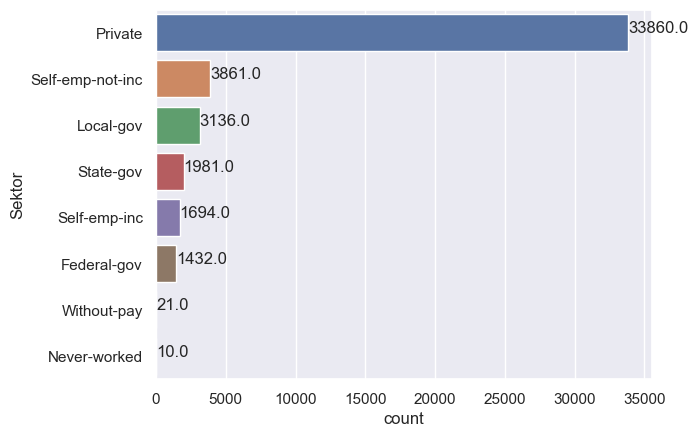

In [73]:
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=df, y='Sektor', order=df['Sektor'].value_counts(ascending=False).index)
vp_seaborn_show_values(ax)
plt.show()

<center><h1><strong><font color="red">Apa yang akan anda lakukan pada kelas minoritas pada contoh diatas?</font></strong></h1></center>

In [74]:
minoritas = df[df["Sektor"].isin(["Without-pay","Never-worked"])]
minoritas.describe(include='all')

,Umur,Sektor,fnlwgt,Pendidikan,KelasPendidikan,Status,Pekerjaan,Relationship,Ras,Gender,Gain,Loss,JamKerjaHarian,AsalNegara,Penghasilan
count,31.000000,31,31.000000,31,31.000000,31,21,31,31,31,31.000000,31.000000,31.000000,31,31
unique,NaN,2,NaN,6,NaN,5,9,6,3,2,NaN,NaN,NaN,2,2
top,NaN,Without-pay,NaN,HS-grad,NaN,Married-civ-spouse,Farming-fishing,Own-child,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,21,NaN,16,NaN,14,8,15,26,21,NaN,NaN,NaN,30,29
mean,38.451613,NaN,183106.096774,NaN,8.483871,NaN,NaN,NaN,NaN,NaN,220.322581,60.870968,32.322581,NaN,NaN
std,21.052060,NaN,93727.278012,NaN,1.997848,NaN,NaN,NaN,NaN,NaN,891.135021,338.915205,15.629858,NaN,NaN
min,17.000000,NaN,27012.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,4.000000,NaN,NaN
25%,19.000000,NaN,134392.500000,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,20.000000,NaN,NaN
50%,29.000000,NaN,172949.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,35.000000,NaN,NaN
75%,62.000000,NaN,214294.500000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN


<center><h1><strong><font color="blue">Penelaahan Data (EDA) 04: Memeriksa Outlier (Univariate - Numerik)</font></strong></h1></center>
<center><h2><strong><font color="green">Gunakan Visual Python (Seaborn), Hiraukan bagaimana code dibawah di generate</font></strong></h2></center>
 
 * Saya hanya mencotohkan satu variabel numerik.
 * <strong><font color="red">Latihan</font></strong> lanjutkan untuk variabel lainnya.

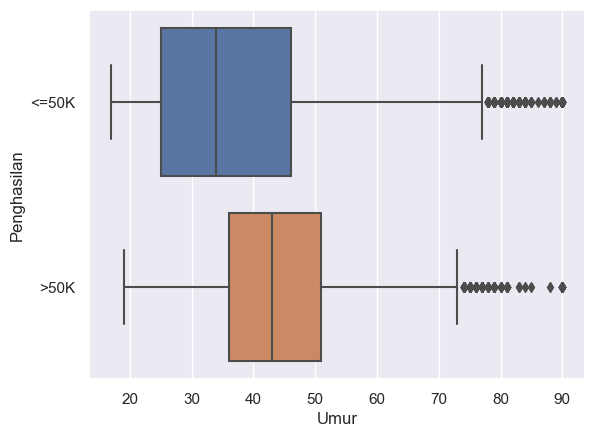

In [77]:
# Visual Python: Visualization > Seaborn
p = sns.boxplot(x="Umur", y="Penghasilan", data=df)
plt.show()

<center><h2><strong><font color="red">Apa yang akan anda lakukan?</font></strong></h2></center>

1. Membiarkan?
2. Filter?
3. Apa konsekuensi masing-masingnya?

<center><h3><strong><font color="green">Dibawah ini "Contoh" ... **KALAU** mau di filter</font></strong></h3></center>

Q1=28.0, Q3=48.0, IQR=20.0


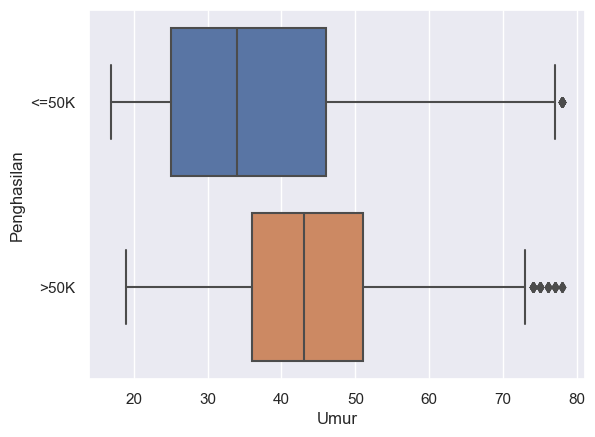

((48575, 15), (48790, 15))

In [78]:
Q1 = df['Umur'].quantile(0.25)
Q3 = df['Umur'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range. 
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

DfNoOutliers = df.drop(df[(df.Umur < Q1-1.5*IQR) | (df.Umur > Q3+1.5*IQR)].index)
p = sns.boxplot(x="Umur", y="Penghasilan", data=DfNoOutliers)
plt.show()
DfNoOutliers.shape, df.shape

<center><h2><strong><font color="red">Mengapa? Apa yang terjadi?</font></strong></h2></center>

* **Latihan**: Periksa nanti pengaruh melakukan atau tidak melakukan filter nanti saat pemodelan

<center><h1><strong><font color="blue">Penelaahan Data (EDA) 05: Missing Values</font></strong></h1></center>
    
Salah satu proses dalam data preprocessing adalah mengidentifikasi dan menangani *missing value*, apa itu *missing value*? *Missing value* adalah istilah untuk data yang hilang

<img alt="" src="images/dt_excel.png" style="height: 200px;" />

## <font color="green">Penyebab Missing Value</font>
*   Error pada *data entry*, baik itu *human error*, kesalahan pada sistem, atau hardware/software fault.
*   Pada data survey/kuesioner, bisa disebabkan oleh responden yang lupa mengisi pertanyaan, pertanyaan yang sulit dimengerti, ataupun pertanyaan enggan diisi karena merupakan pertanyaan yang sensitif
* permasalahan yang dihadapi pada data di dunia nyata adalah, terkadang penandaan untuk mengatakan bahwa data tersebut *missing* sangat beragam, bisa ditulis ‘?’ (tanda tanya), bisa ditulis ‘-‘ (strip), bisa suatu bilangan yang sangat besar atau sangat kecil (misal 99 atau -999), di kosongkan, NaN, dsb.
### <font color="green">Langkah pertama penanganan MV adalah dengan melakukan EDA, terutama mengetahui berapa banyak proporsi data yang Missing.</font>

Perhatikan bahwa data ini memiliki berbagai macam cara untuk mengatakan bahwa data pada *cell* tertentu adalah *missing*, misalnya:

*   *cell*nya dikosongkan
*   ditulis dengan n/a, NA, na, ataupun NaN
*   ditulis dengan symbol –
*   ataupun mempunyai nilai yang cukup aneh seperti nilai 12 pada kolom OWN_OCCUPIED, ataupun HURLEY pada kolom NUM_BATH

Ketika kita meng-load data ini ke python menggunakan pandas, beberapa notasi *missing* yang umum [otomatis](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) dikategorikan sebagai NaN (notasi *missing value* pada python)

<img alt="" src="images/pd_nulls.png"/>

* https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

#  Menangani *Missing Value*

Setelah kita mengenali apa itu *missing value*, bagaimana biasanya *missing value* itu ditulis, dan juga apa saja tipe *missing value*. Sekarang akan dijelaskan bagaimana cara menghandle *missing value*

<img alt="" src="images/mv_flowchart.png"  style="height: 450px;"/>

### sumber gambar : https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4

# <center><font color="blue"> Missing Values Treatment 01: Deletion</font></center>

* Jika data yang missing sedikit "dan" tidak terlalu berharga, biasanya relatif aman untuk tidak mengikutsertakan data tersebut dalam proses pengolahan data selanjutnya.
* Jika suatu variabel memiliki terlalu banyak missing value, secara umum juga aman untuk tidak mengikutsertakan data tersebut dalam proses pengolahan data selanjutnya.
* Terdapat beberapa cara dalam menghapus data:
    - **Listwise Deletion**: menghapus baris/record yang mempunyai satu atau lebih *missing* di suatu variabelnya.

<img alt="" src="images/mv_all.png" style="height: 200px;"/>

    - **Pairwise Deletion**: menghapus *missing value* dengan memperhatikan variabel-variabel yang ingin digunakan. misal kita ingin mencari korelasi antara **variabel A** dan **variabel B**, maka kita hanya perlu menghapus baris yang bersesuaian tersebut.

<img alt="" src="images/mv_part.png" style="height: 200px;"/>

# <center><font color="blue"> Missing Values Treatment 02: Mengabaikan missing value</font></center>

* Beberapa algoritma machine learning atau metode analisis lainnya memiliki kemampuan internal model/algoritma untuk  menangani missing value, contohnya adalah decision tree, k-Nearest Neighbors (k-NN), Neural network yang dapat mengimputasi sendiri missing value pada data.

* Ataupun jika ada beberapa kolom yang tidak memberikan informasi apa apa, kita dapat membiarkan missing value ada di kolom tersebut karena kolom tersebut pun tidak memberikan informasi yang signifikan, contohnya adalah nomor tiket pada data penerbangan, kita tidak perlu sulit-sulit memikirkan bagaimana cara mengimputasi kolom tersebut. Cukup drop kolom tersebut.

# <center><font color="blue"> Tipe Missing Value</font></center>
<font color="green">Langkah kedua penanganan MV adalah meneliti bagaimana MV terdistribusi (tipe MV).</font>
<img alt="" src="images/Missing value analysis mva.jpeg" style="height: 200px;" />

* **MCAR**: Data hilang secara acak, dan tidak berkaitan dengan variabel/mekanisme apapun.
    - **Contoh**: Beberapa peserta workshop tidak hadir karena alasan masing-masing dan mereka tidak saling berkomunikasi.

* **MAR**: Terdapat hubungan sistematis antara kecenderungan data yang missing dan yang tidak missing, "tapi tidak dengan (harapan nilai) missing value itu sendiri". 
    - **Contoh**: Karena akhir tahun & banyak deadline, sehingga banyak karyawan yang memilih mengerjakan laporan ketimbang ikut workshop.

* **MNAR**: Terdapat hubungan sistematis antara kecenderungan data yang missing dan yang tidak missing, dan juga dengan (harapan nilai) missing value itu sendiri.
    - **Contoh**: Siswa yang memiliki orang tua dengan penghasilan dibawah rata-rata akan lebih sungkan mengisi form yang menanyakan penghasilan orang tua. Apalagi kalau jawabannya harus berupa angka eksak (bukan pilihan berupa interval). Pada siatuasi ini tidak hanya data berpotensi missing, tapi juga berpotensi untuk menurunkan kualitas data (siswa berbohong).
    
* Referensi Little MCar Test: https://journals.sagepub.com/doi/pdf/10.1177/1536867X1301300407
* **Statistic Test**: Terdapat uji statistik untuk MNAR, namun bahasan ini diluar scope. Namun MNAR juga dapat diketahui dari domain/business knowledge. https://towardsdatascience.com/statistical-test-for-mcar-in-python-9fb617a76eac
* MCAR test di Python (gunakan dengan hati-hati): https://rianneschouten.github.io/pyampute/build/html/pyampute.exploration.html#module-pyampute.exploration.mcar_statistical_tests
* Alternatifnya fungsi custom: https://stackoverflow.com/a/76581627/2844866
    
### <font color="green">Langkah ketiga adalah menangani MV.</font>

In [79]:
# General Look at the Missing Values
print(df.isnull().sum())

Umur                  0
Sektor             2795
fnlwgt                0
Pendidikan            0
KelasPendidikan       0
Status                0
Pekerjaan          2805
Relationship          0
Ras                   0
Gender                0
Gain                  0
Loss                  0
JamKerjaHarian        0
AsalNegara          856
Penghasilan           0
dtype: int64


In [80]:
(df.isnull().sum()/len(df)*100).to_frame('persentase missing')

,persentase missing
Umur,0.000000
Sektor,5.728633
fnlwgt,0.000000
Pendidikan,0.000000
KelasPendidikan,0.000000
Status,0.000000
Pekerjaan,5.749129
Relationship,0.000000
Ras,0.000000
Gender,0.000000


# <font color="red">Perhatikan di contoh data ini Missing hanya ada pada variabel kategorik!</font>

# <center><font color="blue">Visualisasi Missing Values</font></center>

* Berguna jika datanya besar dan memiliki keterurutan tertentu.

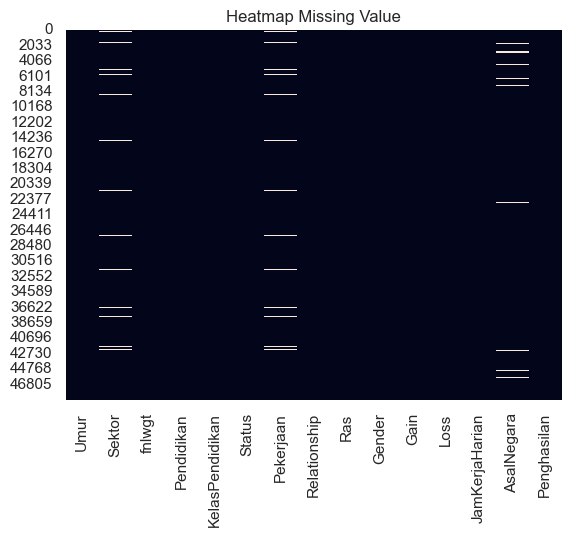

In [81]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

# Solusi sederhsna jika MV tidak banyak: Drop

## Ada beberapa pendekatan Drop

In [82]:
X = df.dropna() # jika ada MV minimal satu di salah satu kolom, maka baris di hapus
#df.dropna(how='all') # jika ada MV di semua kolom, maka baris di hapus
#df.dropna(thresh=2) # jika ada MV minimal di salah 2 kolom, maka baris di hapus
#df.dropna(subset=['Pekerjaan'])[:7] # jika ada MV minimal satu di salah kolom Dist_Hospital
print(df.shape, X.shape)
X.head()

(48790, 15) (45175, 15)


,Umur,Sektor,fnlwgt,Pendidikan,KelasPendidikan,Status,Pekerjaan,Relationship,Ras,Gender,Gain,Loss,JamKerjaHarian,AsalNegara,Penghasilan
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [83]:
print(X.isnull().sum())

Umur               0
Sektor             0
fnlwgt             0
Pendidikan         0
KelasPendidikan    0
Status             0
Pekerjaan          0
Relationship       0
Ras                0
Gender             0
Gain               0
Loss               0
JamKerjaHarian     0
AsalNegara         0
Penghasilan        0
dtype: int64


<center><h1><strong><font color="blue">Imputasi Sederhana Dengan Ukuran Pusat Data</font></strong></h1></center>

## Syarat:

1. Missing tidak terlalu banyak
2. Imputasi Dengan Rata-Rata untuk Variabel Numerik yang berdistribusi (hampir) Normal
3. Imputasi Dengan Modus untuk Variabel Kategorik yang berdistribusi (hampir) homogen/Univariate

 * <strong><font color="red">Latihan</font></strong> lanjutkan untuk variabel lainnya.

In [84]:
df.head(3)

,Umur,Sektor,fnlwgt,Pendidikan,KelasPendidikan,Status,Pekerjaan,Relationship,Ras,Gender,Gain,Loss,JamKerjaHarian,AsalNegara,Penghasilan
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [85]:
# Misal di imputasi dengan Modus .... apa yang terjadi?
print(df.isnull().sum())

df["Sektor"].fillna(df["Sektor"].mode(), inplace = True)

print('\n\n',df.isnull().sum())

Umur                  0
Sektor             2795
fnlwgt                0
Pendidikan            0
KelasPendidikan       0
Status                0
Pekerjaan          2805
Relationship          0
Ras                   0
Gender                0
Gain                  0
Loss                  0
JamKerjaHarian        0
AsalNegara          856
Penghasilan           0
dtype: int64


 Umur                  0
Sektor             2795
fnlwgt                0
Pendidikan            0
KelasPendidikan       0
Status                0
Pekerjaan          2805
Relationship          0
Ras                   0
Gender                0
Gain                  0
Loss                  0
JamKerjaHarian        0
AsalNegara          856
Penghasilan           0
dtype: int64


In [86]:
print(df.isnull().sum())

df["Sektor"].fillna(df["Sektor"].value_counts().index[0], inplace = True)

print('\n\n',df.isnull().sum())

Umur                  0
Sektor             2795
fnlwgt                0
Pendidikan            0
KelasPendidikan       0
Status                0
Pekerjaan          2805
Relationship          0
Ras                   0
Gender                0
Gain                  0
Loss                  0
JamKerjaHarian        0
AsalNegara          856
Penghasilan           0
dtype: int64


 Umur                  0
Sektor                0
fnlwgt                0
Pendidikan            0
KelasPendidikan       0
Status                0
Pekerjaan          2805
Relationship          0
Ras                   0
Gender                0
Gain                  0
Loss                  0
JamKerjaHarian        0
AsalNegara          856
Penghasilan           0
dtype: int64


In [87]:
df["Sektor"].unique()

['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked']
Categories (8, object): ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']

<center><h1><strong><font color="blue">Penelaahan Data (EDA) 06: Transformasi</font></strong></h1></center>
<center><h3><font color="red">Biasanya dilakukan karena Hal-Hal berikut:</font></h3></center>

* Variabel numerik & Model Menggunakan Konsep Jarak: Skala variabel berbeda jauh. Misal X1=Gaji dalam jutaan dan X2=Jumlah Anak
* Model yang digunakan Linear (Regresi), tapi ada variabel yang hubungannya dengan variabel target tidak linear. Mengacu pada Regresi Non Linear.
* Variabelnya Kategorik, tapi model hanya menerima input numerik ==> Maka perlu dibentuk Variabel Dummt=y atau (One-Hot) Encoding.

## Contoh Model Pohon Keputusan yang tidak bisa numerik di Scikit Learn:

- https://scikit-learn.org/stable/modules/tree.html
- https://github.com/scikit-learn/scikit-learn/issues/5442

<img alt="" src="images/dt-noCat-skLearn.png"/>

# One-Hot-Encoding

In [95]:
df.head()

,Umur,fnlwgt,KelasPendidikan,Gain,Loss,JamKerjaHarian,Penghasilan,_Federal-gov,_Local-gov,_Never-worked,...,_Portugal,_Puerto-Rico,_Scotland,_South,_Taiwan,_Thailand,_Trinadad&Tobago,_United-States,_Vietnam,_Yugoslavia
0,39,77516,13,2174,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [96]:
df['Penghasilan'].unique()

['<=50K', '>50K']
Categories (2, object): ['<=50K', '>50K']

In [89]:
df2 = pd.get_dummies(df['Ras'], prefix='')
df2.head()

,_Amer-Indian-Eskimo,_Asian-Pac-Islander,_Black,_Other,_White
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,True,False,False
4,False,False,True,False,False


<center><h1><strong><font color="blue">Transformasi di seluruh Variabel Kategorik</font></strong></h1></center>

In [90]:
print(df.shape)
for col in catVar.columns:
    if col != 'Penghasilan':
        transformasi = pd.get_dummies(df[col], prefix='')
        df = pd.concat([df, transformasi], axis = 1)
        # Hapus Variabel Kategorik Awal, Sudah tidak diperlukan
        try:
            df.drop([col], axis=1, inplace=True) 
        except Exception as err_:
            print(err_)
print(df.shape)
df.head()

(48790, 15)
(48790, 106)


,Umur,fnlwgt,KelasPendidikan,Gain,Loss,JamKerjaHarian,Penghasilan,_Federal-gov,_Local-gov,_Never-worked,...,_Portugal,_Puerto-Rico,_Scotland,_South,_Taiwan,_Thailand,_Trinadad&Tobago,_United-States,_Vietnam,_Yugoslavia
0,39,77516,13,2174,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Saving (preprocessed) Data

* Agar bisa digunakan saat pemodelan tanpa harus ulang preprocessing berkali-kali
* Tapi ingat ... tadi diatas saya hanya mencontohkan satu variabel di data pada setiap proses penelaahan data. Silahkan lengkapi sebelum digunakan saat pemodelan.

In [ ]:
# Saving the preprocessed Data for future use/analysis
df.to_csv("data/adult_PreProcessed.csv", encoding='utf8', index=False)

<center><h1><strong><font color="red">Latihan</font></strong></h1></center>

* Lengkapi Proses Diatas
* Atau Gunakan data berikut:

In [ ]:
file_ = 'data/price.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    price = pd.read_csv(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
    price = pd.read_csv(file_)
    
N, P = price.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
print("Tipe Variabe df = ", type(price))
price